# Imports

In [1]:
import os
import pandas as pd

In [2]:
csv_path = '../content/sample_data' # google colab path
#csv_path = '../raw_data' # our pc path
cleandf = pd.read_csv(os.path.join(csv_path, 'clean_data.csv'))

In [3]:
cleandf

,Unnamed: 0,text,target
0,0,smell hillary fear daniel greenfield shillman ...,0
1,1,watch exact moment paul ryan commit political ...,0
2,2,kerry go paris gesture sympathy u secretary st...,1
3,3,bernie supporter twitter erupt anger dnc try w...,0
4,4,battle new york primary matter primary day new...,1
...,...,...,...
6330,6330,state department say can find email clinton sp...,1
6331,6331,p pb stand plutocratic pentagon p pb stand plu...,0
6332,6332,anti trump protester tool oligarchy informatio...,0
6333,6333,ethiopia obama seek progress peace security ea...,1


In [4]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from tensorflow.keras.layers import Dense, Conv1D, Embedding, Flatten, Masking, Dropout, LSTM, GRU
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Variables

In [5]:
es = EarlyStopping(monitor='val_binary_accuracy', patience=10, restore_best_weights=True)

In [6]:
binacc = BinaryAccuracy()
prec = Precision()
rec = Recall()

# Functions

In [8]:
def plot_loss_accuracy(history, title):
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(15,10))
    
    ax1.plot(history.history['loss'])
    ax1.plot(history.history['val_loss'])
    ax1.set_title(f'{title} Loss')
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylim(ymin=0, ymax=2)
    ax1.legend(['Train', 'Validation'], loc='best')
    ax1.grid(axis="x",linewidth=0.5)
    ax1.grid(axis="y",linewidth=0.5)    
    
    ax2.plot(history.history['binary_accuracy'])
    ax2.plot(history.history['val_binary_accuracy'])
    ax2.set_title(f'{title} Accuracy')
    ax2.set_ylabel('Accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylim(ymin=0, ymax=2)
    ax2.legend(['Train', 'Validation'], loc='best')
    ax2.grid(axis="x",linewidth=0.5)
    ax2.grid(axis="y",linewidth=0.5)    

    ax3.plot(history.history['precision'])
    ax3.plot(history.history['val_precision'])
    ax3.set_title(f'{title} Precision')
    ax3.set_ylabel('Precision')
    ax3.set_xlabel('Epoch')
    ax3.set_ylim(ymin=0, ymax=2)
    ax3.legend(['Train', 'Validation'], loc='best')
    ax3.grid(axis="x",linewidth=0.5)
    ax3.grid(axis="y",linewidth=0.5)    
    
    ax4.plot(history.history['recall'])
    ax4.plot(history.history['val_recall'])
    ax4.set_title(f'{title} Recall')
    ax4.set_ylabel('Recall')
    ax4.set_xlabel('Epoch')
    ax4.set_ylim(ymin=0, ymax=2)
    ax4.legend(['Train', 'Validation'], loc='best')
    ax4.grid(axis="x",linewidth=0.5)
    ax4.grid(axis="y",linewidth=0.5)  
    
    plt.show()

In [26]:
def initialize_model (model_name, neurons):
    model = Sequential()
    model.add(Embedding(
        input_dim=(len(tokenizer.word_index))+1, # +1 for the 0 padding
        input_length=300, # Max_sentence_length (optional, for model summary)
        output_dim=100,
        mask_zero=True, # Built-in masking layer :)
    ))
    if model_name == 'lstm':
        model.add(LSTM((neurons*2), return_sequences=False))
        model.add(Dense((neurons), activation='relu'))
    if model_name == 'gru':
        model.add(GRU((neurons*2), return_sequences=False))
        model.add(Dense((neurons), activation='relu'))
    if model_name == 'cnn':
        model.add(Conv1D(neurons, kernel_size=5, activation='tanh'))
        model.add(Flatten())
        model.add(Dense((neurons/2), activation='relu'))
    #model.add(Dropout(rate=0.2))
    model.add(Dense(1, activation='sigmoid'))
    return model

In [20]:
def compile_model(model):
    model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.0001), 
              metrics=[binacc, prec, rec]) 
    return model

# Testing models

## CNN model

### Preparing data

In [56]:
X_train, X_test, y_train, y_test = train_test_split(cleandf['text'], cleandf['target'], test_size=0.25)
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_token = tokenizer.texts_to_sequences(X_train)
X_test_token = tokenizer.texts_to_sequences(X_test)
X_train_token = pad_sequences(X_train_token, dtype='int32', padding='post', maxlen=300)
X_test_token = pad_sequences(X_test_token, dtype='int32', padding='post', maxlen=300)
qty_neurons = [4, 6, 8, 10, 12]

### Testing model

50/50 [==============================] - 0s 4ms/step - loss: 0.6709 - binary_accuracy: 0.7677 - precision: 0.9463 - recall: 0.5826


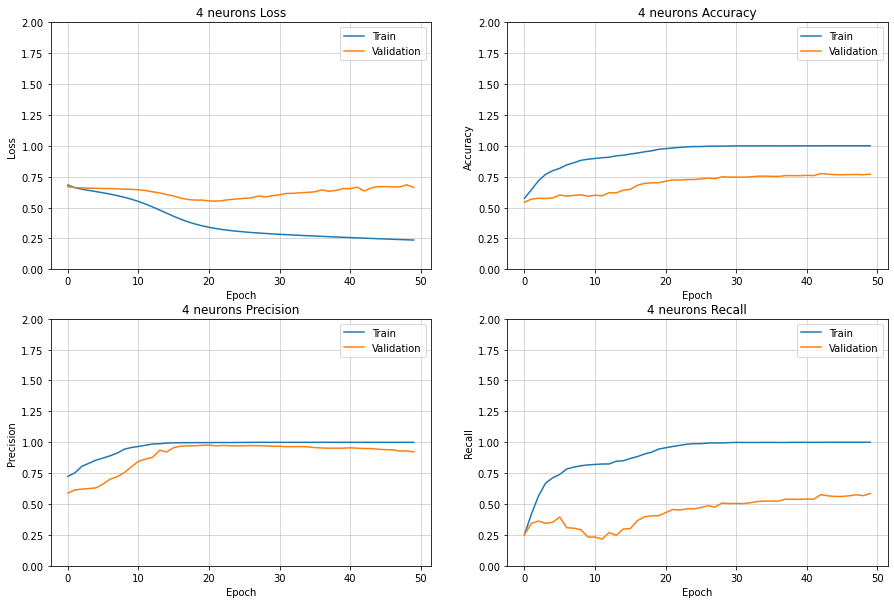

50/50 [==============================] - 0s 3ms/step - loss: 0.2649 - binary_accuracy: 0.9236 - precision: 0.9183 - recall: 0.9351


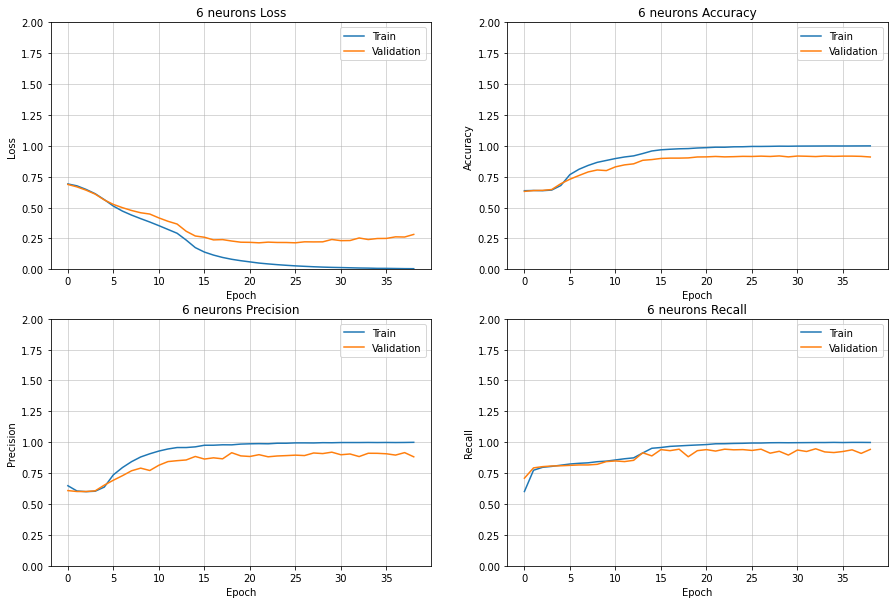

50/50 [==============================] - 0s 4ms/step - loss: 0.3412 - binary_accuracy: 0.9141 - precision: 0.9068 - recall: 0.9290


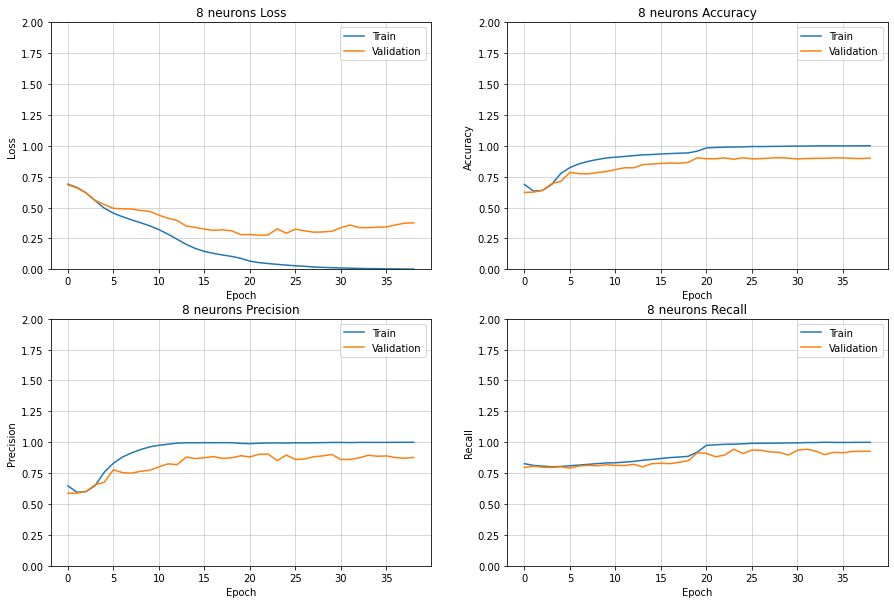

50/50 [==============================] - 0s 4ms/step - loss: 0.2501 - binary_accuracy: 0.9261 - precision: 0.9177 - recall: 0.9412


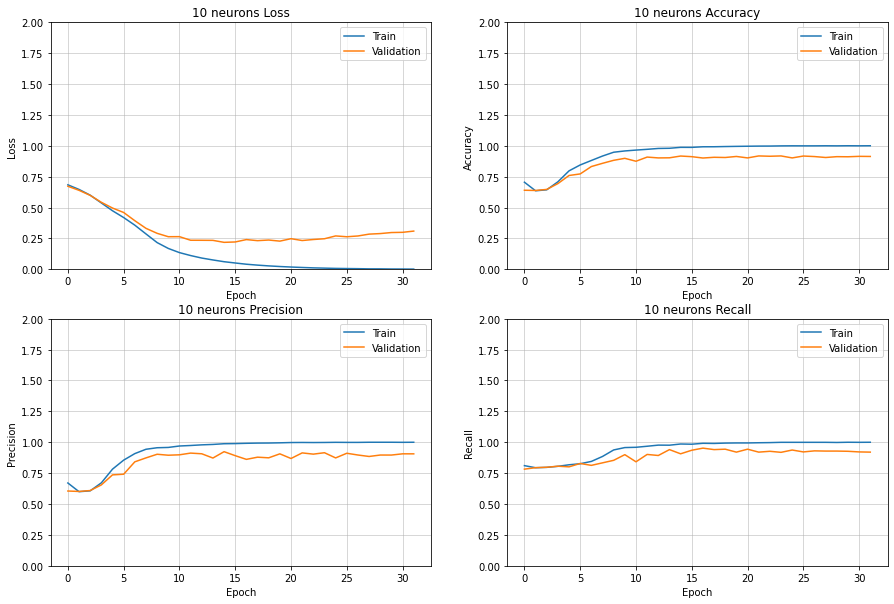

50/50 [==============================] - 0s 4ms/step - loss: 0.2197 - binary_accuracy: 0.9261 - precision: 0.9364 - recall: 0.9192


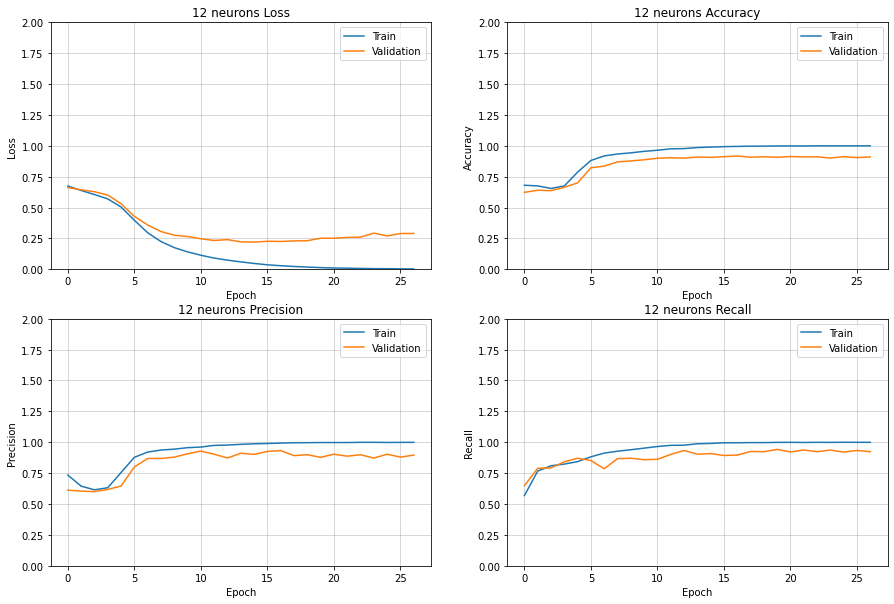

CPU times: user 2min 49s, sys: 17 s, total: 3min 6s
Wall time: 2min 57s


In [57]:
%%time
for neurons in qty_neurons:
    model = compile_model(initialize_model('cnn', neurons))
    #model.summary()
    history = model.fit(X_train_token, y_train, 
          epochs=50, 
          batch_size=32,
          validation_split=0.25,
          callbacks=[es],
        verbose = 0, 
        use_multiprocessing=True
          )
    model.evaluate(X_test_token, y_test, verbose=1)
    plot_loss_accuracy(history, f'{neurons} neurons')

## Result:
### Best number of neurons: 12
### Sidenote: fastest model

## LSTM model

### Preparing data

In [49]:
X_train, X_test, y_train, y_test = train_test_split(cleandf['text'], cleandf['target'], test_size=0.2)
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_token = tokenizer.texts_to_sequences(X_train)
X_test_token = tokenizer.texts_to_sequences(X_test)
X_train_token = pad_sequences(X_train_token, dtype='int32', padding='post', maxlen=300)
X_test_token = pad_sequences(X_test_token, dtype='int32', padding='post', maxlen=300)
qty_neurons = [48, 52, 56]

### Testing model

40/40 [==============================] - 0s 11ms/step - loss: 0.4724 - binary_accuracy: 0.8966 - precision: 0.8799 - recall: 0.9101


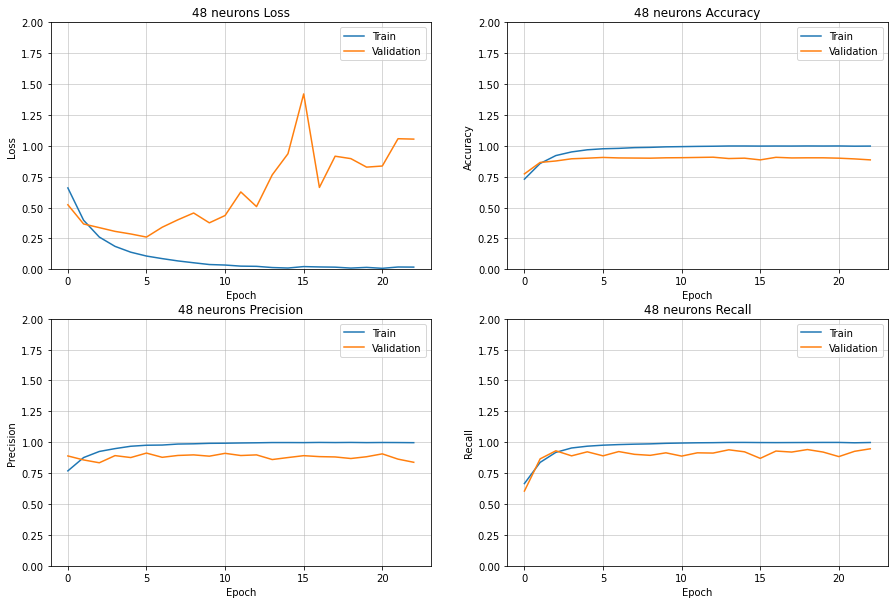

40/40 [==============================] - 1s 12ms/step - loss: 0.2296 - binary_accuracy: 0.9132 - precision: 0.8838 - recall: 0.9444


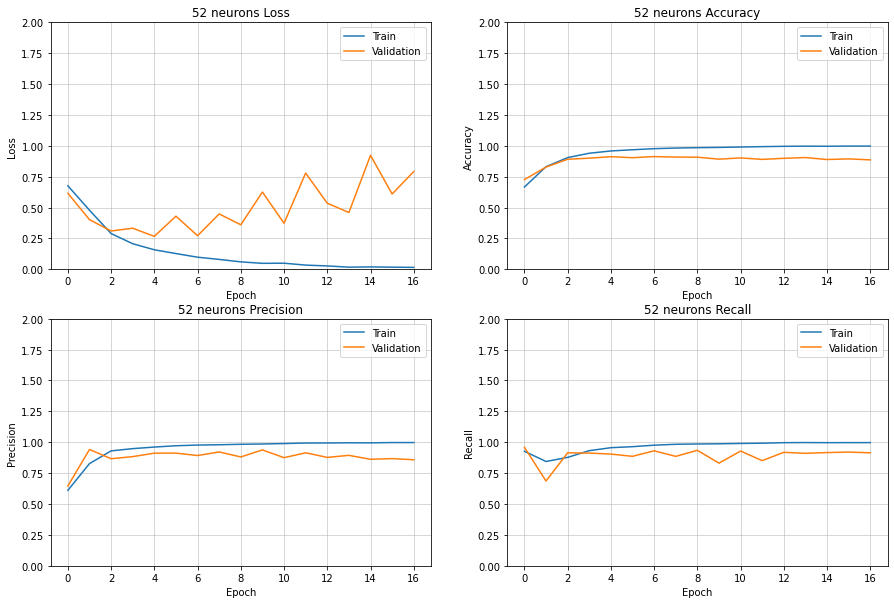

40/40 [==============================] - 0s 9ms/step - loss: 0.2895 - binary_accuracy: 0.9077 - precision: 0.8885 - recall: 0.9248


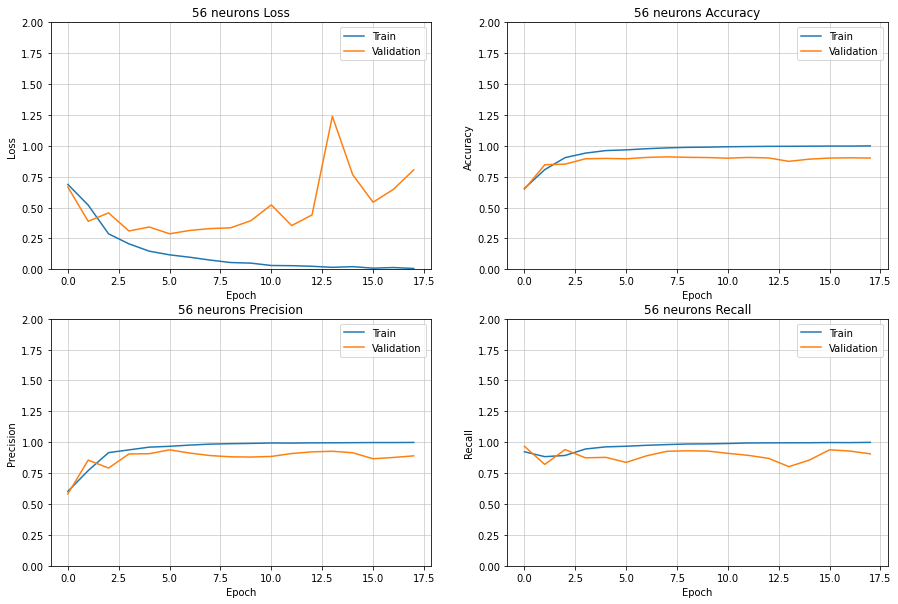

CPU times: user 6min 7s, sys: 22.7 s, total: 6min 30s
Wall time: 6min 26s


In [50]:
%%time
for neurons in qty_neurons:
    model = compile_model(initialize_model('lstm', neurons))
    #model.summary()
    history = model.fit(X_train_token, y_train, 
          epochs=50, 
          batch_size=16,
          validation_split=0.2,
          callbacks=[es],
        verbose = 0, 
        use_multiprocessing=True
          )
    model.evaluate(X_test_token, y_test, verbose=1)
    plot_loss_accuracy(history, f'{neurons} neurons')

## Result:
### Best number of neurons: 104
### Sidenote: takes tooooo long

## GRU model

### Preparing data

In [51]:
X_train, X_test, y_train, y_test = train_test_split(cleandf['text'], cleandf['target'], test_size=0.3)
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_token = tokenizer.texts_to_sequences(X_train)
X_test_token = tokenizer.texts_to_sequences(X_test)
X_train_token = pad_sequences(X_train_token, dtype='int32', padding='post', maxlen=300)
X_test_token = pad_sequences(X_test_token, dtype='int32', padding='post', maxlen=300)
qty_neurons = [48, 52, 56]

### Testing model

60/60 [==============================] - 1s 8ms/step - loss: 0.3745 - binary_accuracy: 0.9174 - precision: 0.9217 - recall: 0.9109


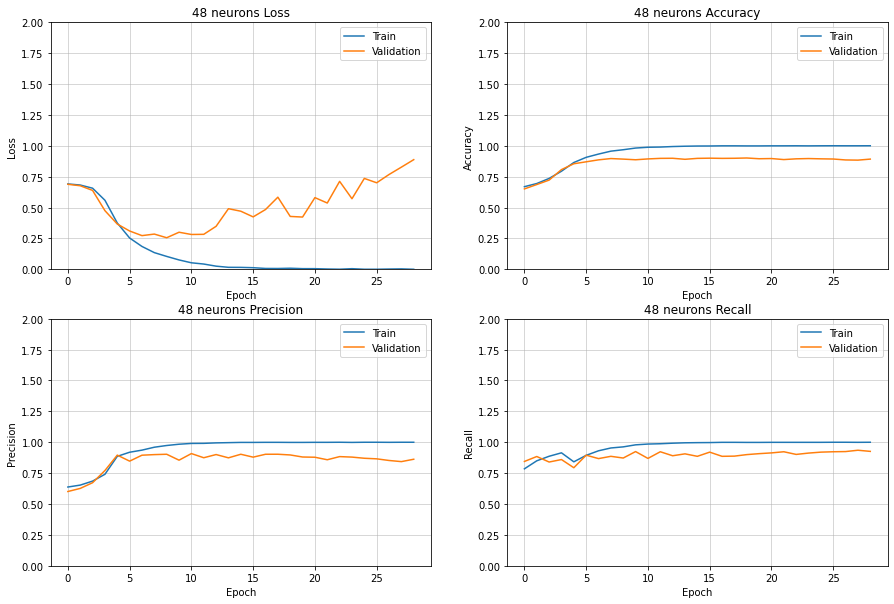

60/60 [==============================] - 1s 9ms/step - loss: 0.7746 - binary_accuracy: 0.9185 - precision: 0.9330 - recall: 0.9003


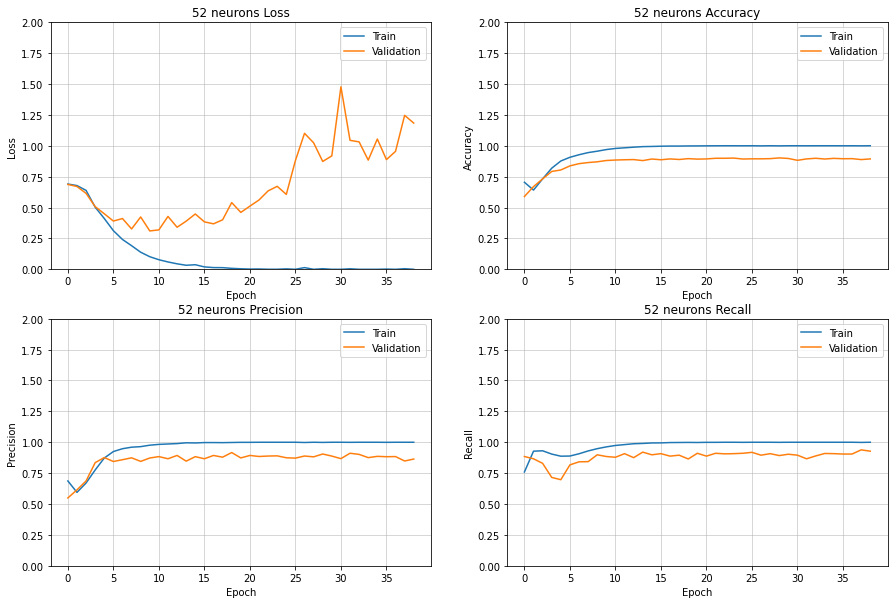

60/60 [==============================] - 1s 9ms/step - loss: 0.2927 - binary_accuracy: 0.9164 - precision: 0.9083 - recall: 0.9247


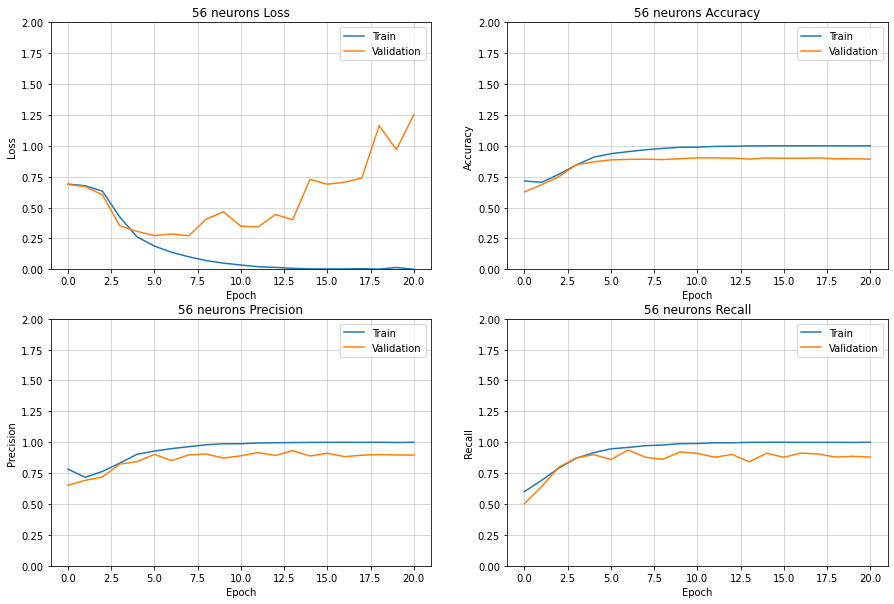

CPU times: user 3min 45s, sys: 14.2 s, total: 3min 59s
Wall time: 3min 9s


In [52]:
%%time
for neurons in qty_neurons:
    model = compile_model(initialize_model('gru', neurons))
    #model.summary()
    history = model.fit(X_train_token, y_train, 
          epochs=50, 
          batch_size=32,
          validation_split=0.3,
          callbacks=[es],
        verbose = 0, 
        use_multiprocessing=True
          )
    model.evaluate(X_test_token, y_test, verbose=1)
    plot_loss_accuracy(history, f'{neurons} neurons')

## Result:
### Best number of neurons: 112

## Conclusion:
### We can drop LSTM and GRU models, they take way longer than CNN without any clear improvement on the accuracy, precision, and recall metrics.